In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("BlackFriday.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

## Removing Null columns (product category 2 and 3)

In [5]:
df1 = df.copy()

In [6]:
del(df['Product_Category_2'])
del(df['Product_Category_3'])

In [7]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

In [8]:
for col in df.columns:
    print(col , df[col].nunique())

User_ID 5891
Product_ID 3623
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 18
Purchase 17959


## Analysing Gender On basis of purchase amount

<Axes: >

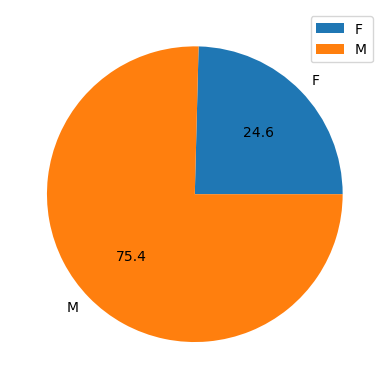

In [9]:
df.groupby('Gender').size().plot(kind = 'pie', legend = True , autopct = "%.1f")

<Axes: title={'center': 'Purchasing Order Freq'}, xlabel='Age'>

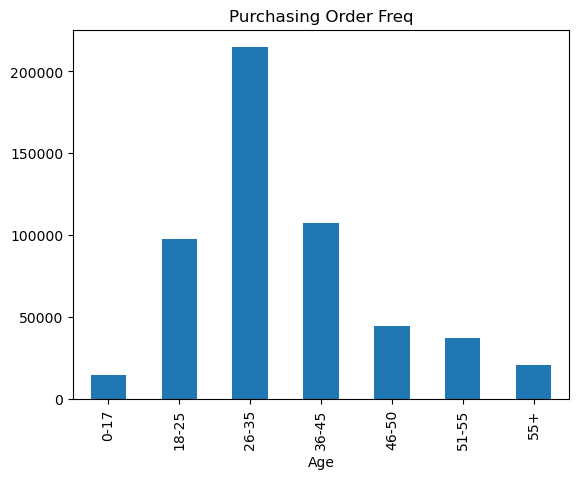

In [16]:
df.groupby('Age').size().plot(kind = "bar" , title = "Purchasing Order Freq")

<Axes: xlabel='Age', ylabel='count'>

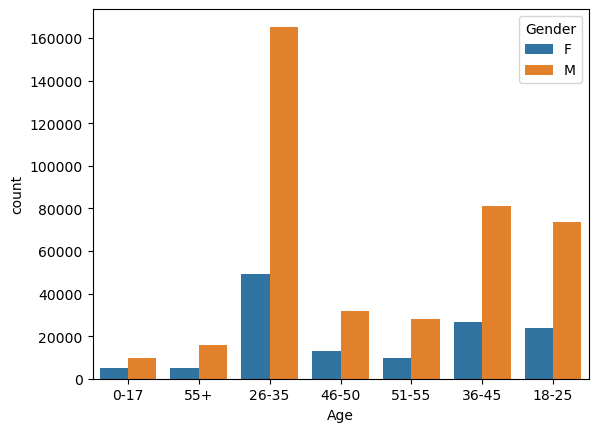

In [25]:
sns.countplot(data = df , x = 'Age' , hue = 'Gender')

<Axes: title={'center': 'Purchase By Age'}, ylabel='Purchase'>

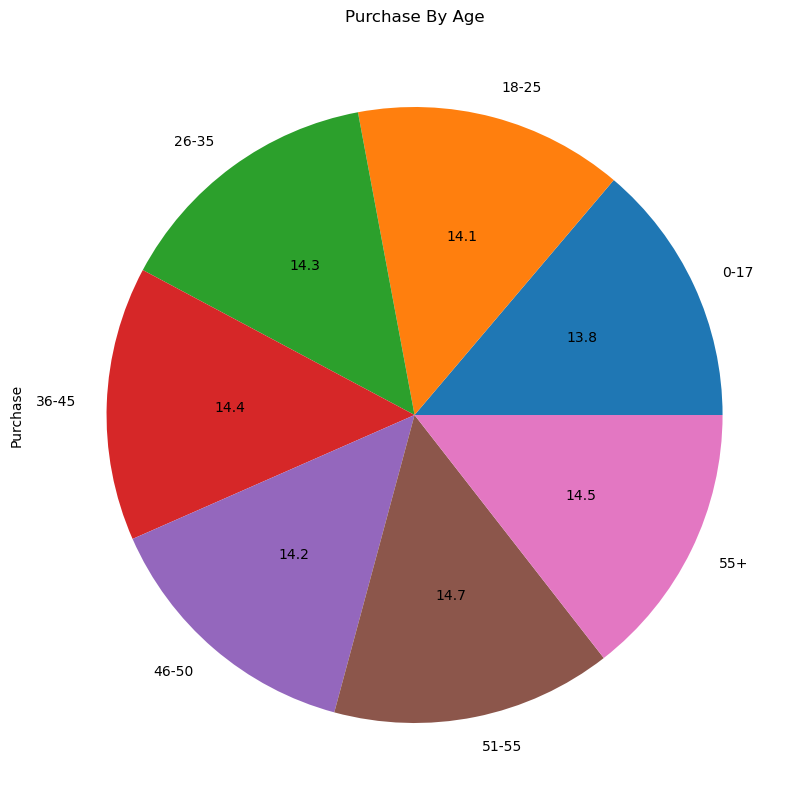

In [24]:
df.groupby('Age')['Purchase'].mean().plot(kind='pie', title="Purchase By Age", figsize=(10, 10) , autopct = "%.1f")

<Axes: title={'center': 'City Distribution'}, ylabel='Purchase'>

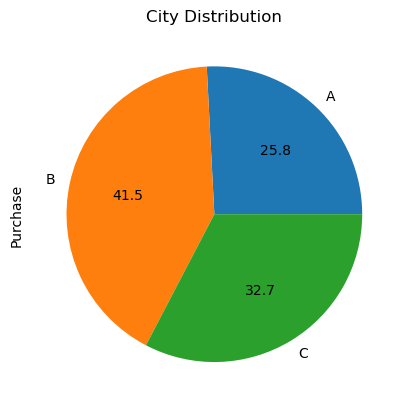

In [27]:
df.groupby('City_Category')['Purchase'].sum().plot(kind = "pie" , autopct = "%.1f" , title = "City Distribution")

<Axes: title={'center': 'City Distribution'}>

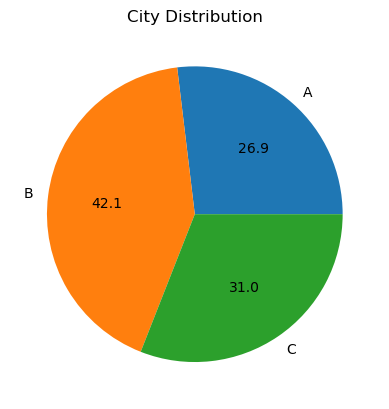

In [28]:
df.groupby('City_Category').size().plot(kind = "pie" , autopct = "%.1f" , title = "City Distribution")

C:\Users\LAKSHAY JAIN\AppData\Local\Temp\ipykernel_33356\2702663385.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Purchase'])


<Axes: xlabel='Purchase', ylabel='Density'>

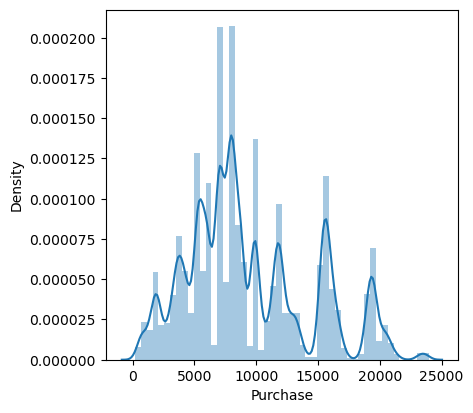

In [33]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(df['Purchase'])